In [39]:
import pandas as pd
import os
print(os.listdir(os.getcwd()))
# Load a single CSV file
#insurance_claims = pd.read_csv('Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/insurance_claims.csv')
#insurance_claims

['.ipynb_checkpoints', 'df_policies.csv', 'dictionaries.py', 'fraud_detection.ipynb', 'functions.py', 'insurance_cleaned.csv', '__pycache__']


In [40]:
import os
print(os.path.abspath("Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/insurance_claims.csv"))


C:\Users\pboat\Desktop\Ironhack\bootcamp\week4\day5\Fraud_Detection\notebooks\Desktop\Ironhack\bootcamp\week4\day5\Fraud_Detection\data\raw\insurance_claims.csv


In [41]:
import os
file_path = r"C:\Users\pboat\Desktop\Ironhack\bootcamp\week4\day5\Fraud_Detection\data\raw\insurance_claims.csv"
print(os.path.exists(file_path))  # Verify if the file exists

True


In [42]:
import pandas as pd

file_path = r"C:\Users\pboat\Desktop\Ironhack\bootcamp\week4\day5\Fraud_Detection\data\raw\insurance_claims.csv"
df = pd.read_csv(file_path)
display(df.head(5))

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [43]:
#Create a commun format for the columns

df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [44]:
insurance_cleaned = df.dropna(axis=1, how='all')  # Removing all columns with all NaN values
df_cleaned = insurance_cleaned.dropna(axis=1, how='all')  # Removing all columns with all NaN values again (redundant)
df_cleaned.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [45]:
# Define the refined table by dropping unnecessary columns
def clean_data(df_cleaned):
    columns_to_drop = [
        'policy_bind_date', 
        'policy_csl', 
        'insured_zip', 
        'insured_hobbies', 
        'insured_state', 
        'auto_model', 
        'auto_year',
        'policy_state',
        'months_as_customer',
        'umbrella_limit',
        'incident_date',
        'incident_hour_of_the_day',
        'incident_location',
        'auto_make',
    ]
    
    # Drop columns safely, ignoring errors if they don't exist
    df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

    return df_cleaned  # Return the cleaned DataFrame

# Apply cleaning function
insurance_cleaned = clean_data(insurance_cleaned)

# Save the cleaned DataFrame to a CSV file
#insurance_cleaned.to_csv("insurance_cleaned.csv", index=False)

# Display the first few rows of the refined table
insurance_cleaned.head()


,age,policy_number,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,48,521585,1000,1406.91,MALE,MD,craft-repair,husband,53300,0,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,42,342868,2000,1197.22,MALE,MD,machine-op-inspct,other-relative,0,0,...,1,?,0,0,?,5070,780,780,3510,Y
2,29,687698,2000,1413.14,FEMALE,PhD,sales,own-child,35100,0,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,41,227811,2000,1415.74,FEMALE,PhD,armed-forces,unmarried,48900,-62400,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,44,367455,1000,1583.91,MALE,Associate,sales,unmarried,66000,-46000,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [46]:
# Ensure all rows and columns are displayed
#pd.set_option('display.max_rows', None)  # Show all rows
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.width', None)  # Adjust display width for better visibility
#pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Display the cleaned dataframe
#df_cleaned


In [47]:
# Check the data types of each column
insurance_cleaned.dtypes


age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
fraud_reported           

In [48]:
insurance_cleaned.select_dtypes(include=['number']).head()


,age,policy_number,policy_deductable,policy_annual_premium,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,48,521585,1000,1406.91,53300,0,1,1,2,71610,6510,13020,52080
1,42,342868,2000,1197.22,0,0,1,0,0,5070,780,780,3510
2,29,687698,2000,1413.14,35100,0,3,2,3,34650,7700,3850,23100
3,41,227811,2000,1415.74,48900,-62400,1,1,2,63400,6340,6340,50720
4,44,367455,1000,1583.91,66000,-46000,1,0,1,6500,1300,650,4550


In [49]:
insurance_cleaned.select_dtypes(include=['object']).head()


,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,fraud_reported
0,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Y
1,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Y
2,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,N
3,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Y
4,MALE,Associate,sales,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,N


In [50]:
insurance_cleaned[['collision_type', 'property_damage', 'police_report_available']] = insurance_cleaned[['collision_type', 'property_damage', 'police_report_available']].replace('?', 'None')
insurance_cleaned.head()

,age,policy_number,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,48,521585,1000,1406.91,MALE,MD,craft-repair,husband,53300,0,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,42,342868,2000,1197.22,MALE,MD,machine-op-inspct,other-relative,0,0,...,1,None,0,0,None,5070,780,780,3510,Y
2,29,687698,2000,1413.14,FEMALE,PhD,sales,own-child,35100,0,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,41,227811,2000,1415.74,FEMALE,PhD,armed-forces,unmarried,48900,-62400,...,1,None,1,2,NO,63400,6340,6340,50720,Y
4,44,367455,1000,1583.91,MALE,Associate,sales,unmarried,66000,-46000,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [51]:
# Remove rows containing 'MD' or 'JD' in any column
insurance_cleaned = insurance_cleaned[~df_cleaned.astype(str).apply(lambda row: row.str.contains(r'\b(?:MD|JD)\b', case=False, na=False, regex=True), axis=1).any(axis=1)]

# Display the first few rows of the cleaned DataFrame
display(insurance_cleaned.head())



,age,policy_number,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
2,29,687698,2000,1413.14,FEMALE,PhD,sales,own-child,35100,0,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,41,227811,2000,1415.74,FEMALE,PhD,armed-forces,unmarried,48900,-62400,...,1,None,1,2,NO,63400,6340,6340,50720,Y
4,44,367455,1000,1583.91,MALE,Associate,sales,unmarried,66000,-46000,...,1,NO,0,1,NO,6500,1300,650,4550,N
5,39,104594,1000,1351.10,FEMALE,PhD,tech-support,unmarried,0,0,...,3,NO,0,2,NO,64100,6410,6410,51280,Y
6,34,413978,1000,1333.35,MALE,PhD,prof-specialty,husband,0,-77000,...,3,None,0,0,None,78650,21450,7150,50050,N


In [52]:
# Rename columns
insurance_cleaned = insurance_cleaned.rename(columns={'capital-gains': 'capital_gains', 'capital-loss': 'capital_loss'})

# Remove rows containing 'MD' or 'JD' in any column
insurance_cleaned = insurance_cleaned[~insurance_cleaned.astype(str).apply(
    lambda row: row.str.contains(r'\b(?:MD|JD)\b', case=False, na=False, regex=True), axis=1
).any(axis=1)]

# Save the cleaned DataFrame to a CSV file
insurance_cleaned.to_csv("insurance_cleaned.csv", index=False)

# Display the first few rows of the cleaned DataFrame
display(insurance_cleaned.head())




,age,policy_number,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital_gains,capital_loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
2,29,687698,2000,1413.14,FEMALE,PhD,sales,own-child,35100,0,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,41,227811,2000,1415.74,FEMALE,PhD,armed-forces,unmarried,48900,-62400,...,1,None,1,2,NO,63400,6340,6340,50720,Y
4,44,367455,1000,1583.91,MALE,Associate,sales,unmarried,66000,-46000,...,1,NO,0,1,NO,6500,1300,650,4550,N
5,39,104594,1000,1351.10,FEMALE,PhD,tech-support,unmarried,0,0,...,3,NO,0,2,NO,64100,6410,6410,51280,Y
6,34,413978,1000,1333.35,MALE,PhD,prof-specialty,husband,0,-77000,...,3,None,0,0,None,78650,21450,7150,50050,N


In [54]:
# Define the required columns for the policies table
policies_columns = [
    "policy_number", 
    "policy_deductable", 
    "policy_annual_premium"
]

# Extract the relevant columns from insurance_cleaned
df_policies = insurance_cleaned[policies_columns]

# Save the new DataFrame to a CSV file
df_policies.to_csv("df_policies.csv", index=False)

# Display the new DataFrame
display(df_policies.head())

# Define the save path
save_path = os.path.expanduser("~/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/policies.csv")

# Save the dataframe to CSV
df_policies.to_csv(save_path, index=False, )

print(f"Data saved successfully to: {save_path}")




,policy_number,policy_deductable,policy_annual_premium
2,687698,2000,1413.14
3,227811,2000,1415.74
4,367455,1000,1583.91
5,104594,1000,1351.10
6,413978,1000,1333.35


Data saved successfully to: C:\Users\pboat/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/policies.csv


In [55]:
# Creating the customers table
#customers = insurance_cleaned[['age', 'insured_sex', 'insured_education_level', 
                        #'insured_relationship', 'capital_loss', 'capital_gains', 'policy_number']]

# Display the customers DataFrame
#display(customers.head())

# Define the save path
#save_path = os.path.expanduser("~/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/customers.csv")

# Save the dataframe to CSV
#customers.to_csv(save_path, index=False)

#print(f"Data saved successfully to: {save_path}")


In [56]:
# Creating the customers table (explicitly creating a copy to avoid SettingWithCopyWarning)
customers = insurance_cleaned[['age', 'insured_sex', 'insured_education_level', 
                               'insured_relationship', 'capital_loss', 'capital_gains', 'policy_number']].copy()

# Generate customer_id based on policy_number using .loc
customers.loc[:, 'customer_id'] = customers['policy_number'].apply(lambda x: f"CUST{x}")

# Display the updated customers DataFrame
display(customers.head())

# Define the save path
save_path = os.path.expanduser("~/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/customers.csv")

# Save the dataframe to CSV
customers.to_csv(save_path, index=False, )

print(f"Data saved successfully to: {save_path}")



,age,insured_sex,insured_education_level,insured_relationship,capital_loss,capital_gains,policy_number,customer_id
2,29,FEMALE,PhD,own-child,0,35100,687698,CUST687698
3,41,FEMALE,PhD,unmarried,-62400,48900,227811,CUST227811
4,44,MALE,Associate,unmarried,-46000,66000,367455,CUST367455
5,39,FEMALE,PhD,unmarried,0,0,104594,CUST104594
6,34,MALE,PhD,husband,-77000,0,413978,CUST413978


Data saved successfully to: C:\Users\pboat/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/customers.csv


In [57]:
# Creating the incidents table (ensure all necessary columns are included)
incidents = insurance_cleaned[['incident_type', 'collision_type', 
                               'incident_severity', 'authorities_contacted', 
                               'incident_state', 'number_of_vehicles_involved', 
                               'policy_number']].copy()  

# Generate incidents_id based on policy_number using .loc
incidents.loc[:, 'incident_id'] = incidents['policy_number'].apply(lambda x: f"INC{x}")

# Display the updated incidents DataFrame
display(incidents.head())

# Define the save path correctly
save_dir = os.path.expanduser("~/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw")
save_path = os.path.join(save_dir, "incidents.csv")

# Ensure the directory exists before saving
os.makedirs(save_dir, exist_ok=True)

# Save the updated dataframe to CSV
incidents.to_csv(save_path, index=False, )

print(f"Data saved successfully to: {save_path}")









,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,policy_number,incident_id
2,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,3,687698,INC687698
3,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,1,227811,INC227811
4,Vehicle Theft,None,Minor Damage,None,NY,1,367455,INC367455
5,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,3,104594,INC104594
6,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,3,413978,INC413978


Data saved successfully to: C:\Users\pboat/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw\incidents.csv


In [58]:
# Creating the claim table (ensure all necessary columns are included)
claim = insurance_cleaned[['property_damage', 'bodily_injuries', 
                               'witnesses', 'police_report_available', 
                               'injury_claim', 'property_claim', 
                               'vehicle_claim', 'fraud_reported', 'policy_number']].copy()  

# Generate claim_id based on policy_number using .loc
claim.loc[:, 'claim_id'] = claim['policy_number'].apply(lambda x: f"CL{x}")

# Display the updated incidents DataFrame
display(claim.head())

# Define the save path correctly
save_dir = os.path.expanduser("~/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/")
save_path = os.path.join(save_dir, "claim.csv")

# Ensure the directory exists before saving
os.makedirs(save_dir, exist_ok=True)

# Save the updated dataframe to CSV
claim.to_csv(save_path, index=False, )

print(f"Data saved successfully to: {save_path}")


,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_number,claim_id
2,NO,2,3,NO,7700,3850,23100,N,687698,CL687698
3,None,1,2,NO,6340,6340,50720,Y,227811,CL227811
4,NO,0,1,NO,1300,650,4550,N,367455,CL367455
5,NO,0,2,NO,6410,6410,51280,Y,104594,CL104594
6,None,0,0,None,21450,7150,50050,N,413978,CL413978


Data saved successfully to: C:\Users\pboat/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/claim.csv


In [59]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 2 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   incident_type                695 non-null    object
 1   collision_type               695 non-null    object
 2   incident_severity            695 non-null    object
 3   authorities_contacted        695 non-null    object
 4   incident_state               695 non-null    object
 5   number_of_vehicles_involved  695 non-null    int64 
 6   policy_number                695 non-null    int64 
 7   incident_id                  695 non-null    object
dtypes: int64(2), object(6)
memory usage: 48.9+ KB


In [60]:
incidents.isna().sum()

incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
number_of_vehicles_involved    0
policy_number                  0
incident_id                    0
dtype: int64

In [61]:
incidents['incident_state'].apply(lambda x: len(x)).max()

2

In [77]:
# Compute the total claim amount for each record
claim['total_claim_amount'] = claim['injury_claim'] + claim['property_claim'] + claim['vehicle_claim']

# Compute the average claim amount
average_claim_amount = claim['total_claim_amount'].mean()

# Flag claims that are significantly higher than the average claim amount
threshold = average_claim_amount * 2  # Example: Flag claims that are twice the average
claim['flag_significantly_higher'] = claim['total_claim_amount'] > threshold

# Display the DataFrame with the flagged column
display(claim.head())

# Save the updated DataFrame with the flagged column
save_path = os.path.join(save_dir, "claim_with_flags.csv")
claim.to_csv(save_path, index=False)

print(f"Data with flags saved successfully to: {save_path}")


,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_number,claim_id,total_claim_amount,flag_significantly_higher
2,NO,2,3,NO,7700,3850,23100,N,687698,CL687698,34650,False
3,None,1,2,NO,6340,6340,50720,Y,227811,CL227811,63400,False
4,NO,0,1,NO,1300,650,4550,N,367455,CL367455,6500,False
5,NO,0,2,NO,6410,6410,51280,Y,104594,CL104594,64100,False
6,None,0,0,None,21450,7150,50050,N,413978,CL413978,78650,False


Data with flags saved successfully to: C:\Users\pboat/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/claim_with_flags.csv


Data with flags saved successfully to: C:\Users\pboat/Desktop/Ironhack/bootcamp/week4/day5/Fraud_Detection/data/raw/claim_with_flags.csv


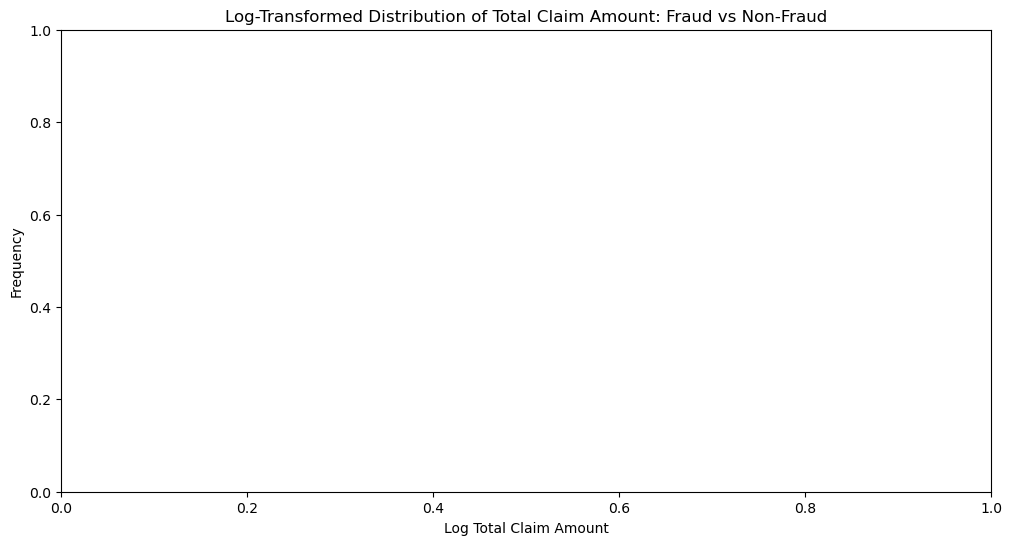

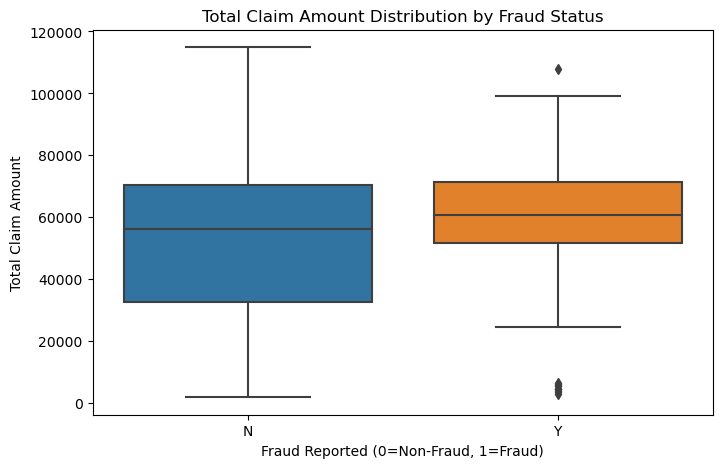

In [80]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming claim DataFrame is already available)
# Ensure there are no missing values before computation
claim = claim.fillna(0)

# Compute the total claim amount for each record
claim['total_claim_amount'] = claim['injury_claim'] + claim['property_claim'] + claim['vehicle_claim']

# Compute the average claim amount
average_claim_amount = claim['total_claim_amount'].mean()

# Flag claims that are significantly higher than the average claim amount
threshold = average_claim_amount * 2  # Example: Flag claims that are twice the average
claim['flag_significantly_higher'] = claim['total_claim_amount'] > threshold

# Save the updated DataFrame with the flagged column
save_path = os.path.join(save_dir, "claim_with_flags.csv")
claim.to_csv(save_path, index=False)
print(f"Data with flags saved successfully to: {save_path}")

# Log transformation to reduce skewness
claim['log_total_claim_amount'] = np.log1p(claim['total_claim_amount'])

# Create subsets for fraud and non-fraud cases
fraud_claims = claim[claim['fraud_reported'] == 1]
non_fraud_claims = claim[claim['fraud_reported'] == 0]

# Plotting the histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(fraud_claims['log_total_claim_amount'], kde=True, color='red', label='Fraud', bins=30, alpha=0.6)
sns.histplot(non_fraud_claims['log_total_claim_amount'], kde=True, color='blue', label='Non-Fraud', bins=30, alpha=0.6)

# Ensure labels are properly set before calling legend
handles, labels = plt.gca().get_legend_handles_labels()
if labels:
    plt.legend()

plt.title('Log-Transformed Distribution of Total Claim Amount: Fraud vs Non-Fraud')
plt.xlabel('Log Total Claim Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=claim)
plt.title('Total Claim Amount Distribution by Fraud Status')
plt.xlabel('Fraud Reported (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Total Claim Amount')
plt.show()
